In [18]:
using Pandas
using DataFrames
using PyCall
using PyPlot
using CSV
using LsqFit
using Printf
using KernelDensity

include("tacos.jl")

numpy = pyimport("numpy")
scipy_integrate = pyimport("scipy.integrate")
pushfirst!(PyVector(pyimport("sys")."path"), "")
frontiers = pyimport("frontiers_colors")

PyObject <module 'frontiers_colors' from '/home/fvalle/phd/mouse_Atlas/frontiers_colors.py'>

In [ ]:
fig, ax = subplots(1,2, figsize=(12,5))
data["freq"].hist(ax=ax[1], bins=10)
ax[1].set_yscale("log")
ax[1].set_xlabel("Frequency", fontsize=24)
ax[1].set_ylabel("pdf", fontsize=24)

f = data["freq"].sort_values(ascending=false)
ax[2].plot(f/f.sum())
ax[2].set_xscale("log")
ax[2].set_yscale("log")
ax[2].set_xlabel("Rank, i", fontsize=24)
ax[2].set_ylabel("f_i", fontsize=24)
fig.savefig("f_distribution.pdf")
show()

In [ ]:
tissue = "Bone-Marrow_c-kit"

data = Dict()
data["data"]=load_pickle("mca/data_$(tissue)_data.pkl")
data["mazzolini"]=load_pickle("mca/data_$(tissue)_mazzolini.pkl")
#data["null_1"]=load_pickle("data_$(tissue)_null_1.pkl")

In [ ]:
fig, ax = subplots(2,2, figsize=(12,10))
f = data["data"]["means_nonzero"].sort_values(ascending=false)

ax[1].hist(f/f.sum(),  bins=10)
ax[1].set_yscale("log")
ax[1].set_xlabel("Frequency", fontsize=24)
ax[1].set_ylabel("pdf", fontsize=24)

ax[2].plot(f/f.sum())
ax[2].set_xscale("log")
ax[2].set_yscale("log")
ax[2].set_ylim(1e-6,1e-1)
ax[2].set_xlabel("Rank, i", fontsize=24)
ax[2].set_ylabel("f_i", fontsize=24)


f = data["data"]["means"].sort_values(ascending=false)

ax[3].hist(f/f.sum(), bins=10)
ax[3].set_yscale("log")
ax[3].set_xlabel("Frequency", fontsize=24)
ax[3].set_ylabel("pdf", fontsize=24)

ax[4].plot(f/f.sum())
ax[4].set_xscale("log")
ax[4].set_yscale("log")
ax[4].set_ylim(1e-6,1e-1)
ax[4].set_xlabel("Rank, i", fontsize=24)
ax[4].set_ylabel("f_i", fontsize=24)
fig.savefig("f_distribution.pdf")
show()

In [ ]:
bins=10
rang = (0-0.5/bins, 1+0.5/bins)
fig, ax = subplots(1,2, figsize=(10,5))

data["data"]["O"].hist(histtype="step", lw=5, ax=ax[1], range=rang, bins=bins, label="data")
data["mazzolini"]["O"].hist(histtype="step", lw=5, ax=ax[1], range=rang, bins=bins, ls="--", label="mazzolini")
data["null_1"]["O"].hist(histtype="step", lw=5, ax=ax[1], range=rang, bins=bins, ls=":", label="null")

ax[1].legend(fontsize=20)
ax[1].set_xlabel("O_i")

data["data"]["O"].hist(histtype="step", lw=5, ax=ax[2], range=rang, bins=bins, label="data")
data["mazzolini"]["O"].hist(histtype="step", lw=5, ax=ax[2], range=rang, bins=bins, ls="--", label="mazzolini")
data["null_1"]["O"].hist(histtype="step", lw=5, ax=ax[2], range=rang, bins=bins, ls=":", label="null")

ax[2].set_yscale("log")
ax[2].legend(fontsize=20)
ax[2].set_xlabel("O_i")

fig.savefig("null_1_U.pdf")

In [ ]:
fig, ax = PyPlot.subplots()

function fx(X)
    ret = Vector{Float64}()
    for x in X.values
        append!(ret, exp(-x))
    end
   return ret
end

ax.scatter(data["data"]["means"], 1-data["data"]["O"], alpha=0.3, label="data")
ax.plot(data["data"]["means"].sort_values(), fx(data["data"]["means"].sort_values()), c="yellow", ls="--", alpha=0.5, label="1-exp(-x)")
ax.scatter(data["mazzolini"]["means"], 1-data["mazzolini"]["O"], c="orange", alpha=0.2, label="mazzolini")
ax.scatter(data["null_1"]["means"], 1-data["null_1"]["O"], marker="x", s=10, c="green", alpha=0.8, label="null_1")


ax.legend()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(1e-4,30)
ax.set_ylim(-0.1,1.1)

ax.set_xlabel("mean", fontsize=24)
ax.set_ylabel("P(0)", fontsize=24)

fig.savefig("null_1_P_mean.pdf")
show()

In [ ]:
data["data"]["means"].sort_values()

In [ ]:
fig, ax = PyPlot.subplots()
ax.plot(data["data"]["freq"].sort_values(ascending=false).values, label="data")
ax.plot(data["mazzolini"]["freq"].sort_values(ascending=false).values, label="mazzolini")
ax.plot(data["null_1"]["freq"].sort_values(ascending=false).values, label="null")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel("Rank, i", fontsize=24)
ax.set_ylabel("f_i", fontsize=24)
show()

fig.savefig("null_1_zipf.pdf")

In [ ]:
fig, ax = PyPlot.subplots(figsize=(10,5))
ax.scatter(data["data"]["M"].values, data["data"]["diffWords"].values, label="data")
ax.scatter(data["mazzolini"]["M"].values, data["mazzolini"]["diffWords"].values, label="mazzolini")
ax.scatter(data["null_1"]["M"].values, data["null_1"]["diffWords"].values, label="null")


ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(500,data["data"]["M"].max()+1e4)
ax.set_ylim(10,data["mazzolini"]["diffWords"].max()+5e3)

ax.set_xlabel("Size", fontsize=24)

ax.set_ylabel("# genes expressed", fontsize=24)
show()

fig.savefig("null_1_heaps.pdf")

In [ ]:
for g in data["data"]["freq"].sort_values(ascending=false).index
    println(g)
end

In [ ]:
keys(load_pickle("data_$(tissue)_data.pkl"))

In [ ]:
tissues

In [ ]:
integrals = []
used_tissues = []
tissues = (split(split(f,"data_")[2],"_data")[1] for f in readdir("mca") if occursin(".pkl",f) && !occursin("mazzolini",f) && !occursin("data_all.pkl",f))

function fit_func(x,a,b)
    return a*x^b
end

for tissue in tissues
    println(tissue)
    integral=load_pickle("mca/data_$(tissue)_data.pkl")["heaps_integral"][1]
    params = load_pickle("mca/data_$(tissue)_data.pkl")["heaps_fit"]
    integral=scipy_integrate.quad(fit_func, 500, 1000, args=(params[1], params[2]))[1]
    append!(integrals, integral::Float64)
end
integrals = DataFrames.DataFrame(data=integrals, index = collect(tissues))
sort!(integrals, rev=true)

In [ ]:
CSV.write("integral_heaps.csv", integrals)

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,15))
for (itissue, tissue) in enumerate(integrals.index)
    ax.plot(itissue, integrals[itissue,1], marker="o", c=frontiers.get_color(tissue), lw=0, ms=15)
end
locs, labels = xticks()
ax.set_xticks(0:length(integrals.index))
ax.set_xticklabels(rotation=90, labels = integrals.index)

ax.set_ylabel("Heaps' integral", fontsize=35)

ax.tick_params(labelsize=25, width=8, length=20)

fig.savefig("itegral_heapfs_scatter_plot_mca.pdf")
fig.savefig("itegral_heapfs_scatter_plot_mca.png")

In [ ]:
CSV.write("integral.csv", integrals)

In [ ]:
integrals.rank=1:length(integrals.index)

In [ ]:
mca_tm

In [ ]:
mca_tm = CSV.read("integral.csv")
select!(mca_tm,Not(:GTex))
mca_tm = DataFrames.dropmissing(mca_tm)
sort!(mca_tm,:TM)
mca_tm.TM = 1:11
sort!(mca_tm,:MCA)
mca_tm.MCA = 1:11
sort!(mca_tm, :MCA)

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,15))
ax.scatter(mca_tm.MCA, mca_tm.TM, c="gray", s=2500)
ax.set_xlabel("MCA integral's rank", fontsize=35)
ax.set_ylabel("TM integral's rank", fontsize=35)

ax.tick_params(labelsize=35, width=8, length=35)


fig.savefig("heaps_rank_both.pdf")
fig.savefig("heaps_rank_both.svg")

In [ ]:
data = Dict()
data["data"]=load_pickle("mca/data_Bone-Marrow_c-kit_data.pkl")
data["mazzolini"]=load_pickle("mca/data_Bone-Marrow_c-kit_mazzolini.pkl")


fig, ax = PyPlot.subplots(figsize=(18,15))

ax.scatter(data["data"]["M"], data["data"]["diffWords"], c="gray", alpha=0.3, s=225)

ax.set_xlabel("UMI per cell", fontsize=35)
ax.set_ylabel("Number of expressed genes", fontsize=35)

#ax.set_xscale("log")
#ax.set_yscale("log")

ax.tick_params(labelsize=35, width=8, length=35)

PyPlot.show()
fig.savefig("heaps_boneMarrow_MCA.pdf")

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,15))

ax.scatter(data["data"]["M"], data["data"]["diffWords"], c="gray", alpha=0.3, s=225, label="data")
ax.scatter(data["mazzolini"]["M"], data["mazzolini"]["diffWords"], c="red", alpha=0.3, s=225, label="Sampling model")

ax.set_xlabel("UMI per cell", fontsize=35)
ax.set_ylabel("Number of expressed genes", fontsize=35)

ax.tick_params(labelsize=35, width=8, length=35)

#ax.set_xscale("log")
#ax.set_yscale("log")

ax.legend(fontsize=35)

PyPlot.show()
fig.savefig("heaps_boneMarrow_sampling_MCA.pdf")

In [15]:
f_gtex = CSV.read("A_gtex.dat", header=true).abundance
f_gtex = sort(f_gtex./sum(f_gtex), rev=true);

In [20]:
f_mca = Tacos.load_pickle("mca/data_all.pkl")["freq"]
f_mca = sort(f_mca./sum(f_mca), rev=true);

In [21]:
f_tm = Tacos.load_pickle("tm/data_all.pkl")["freq"]
f_tm = sort(f_tm./sum(f_tm), rev=true);

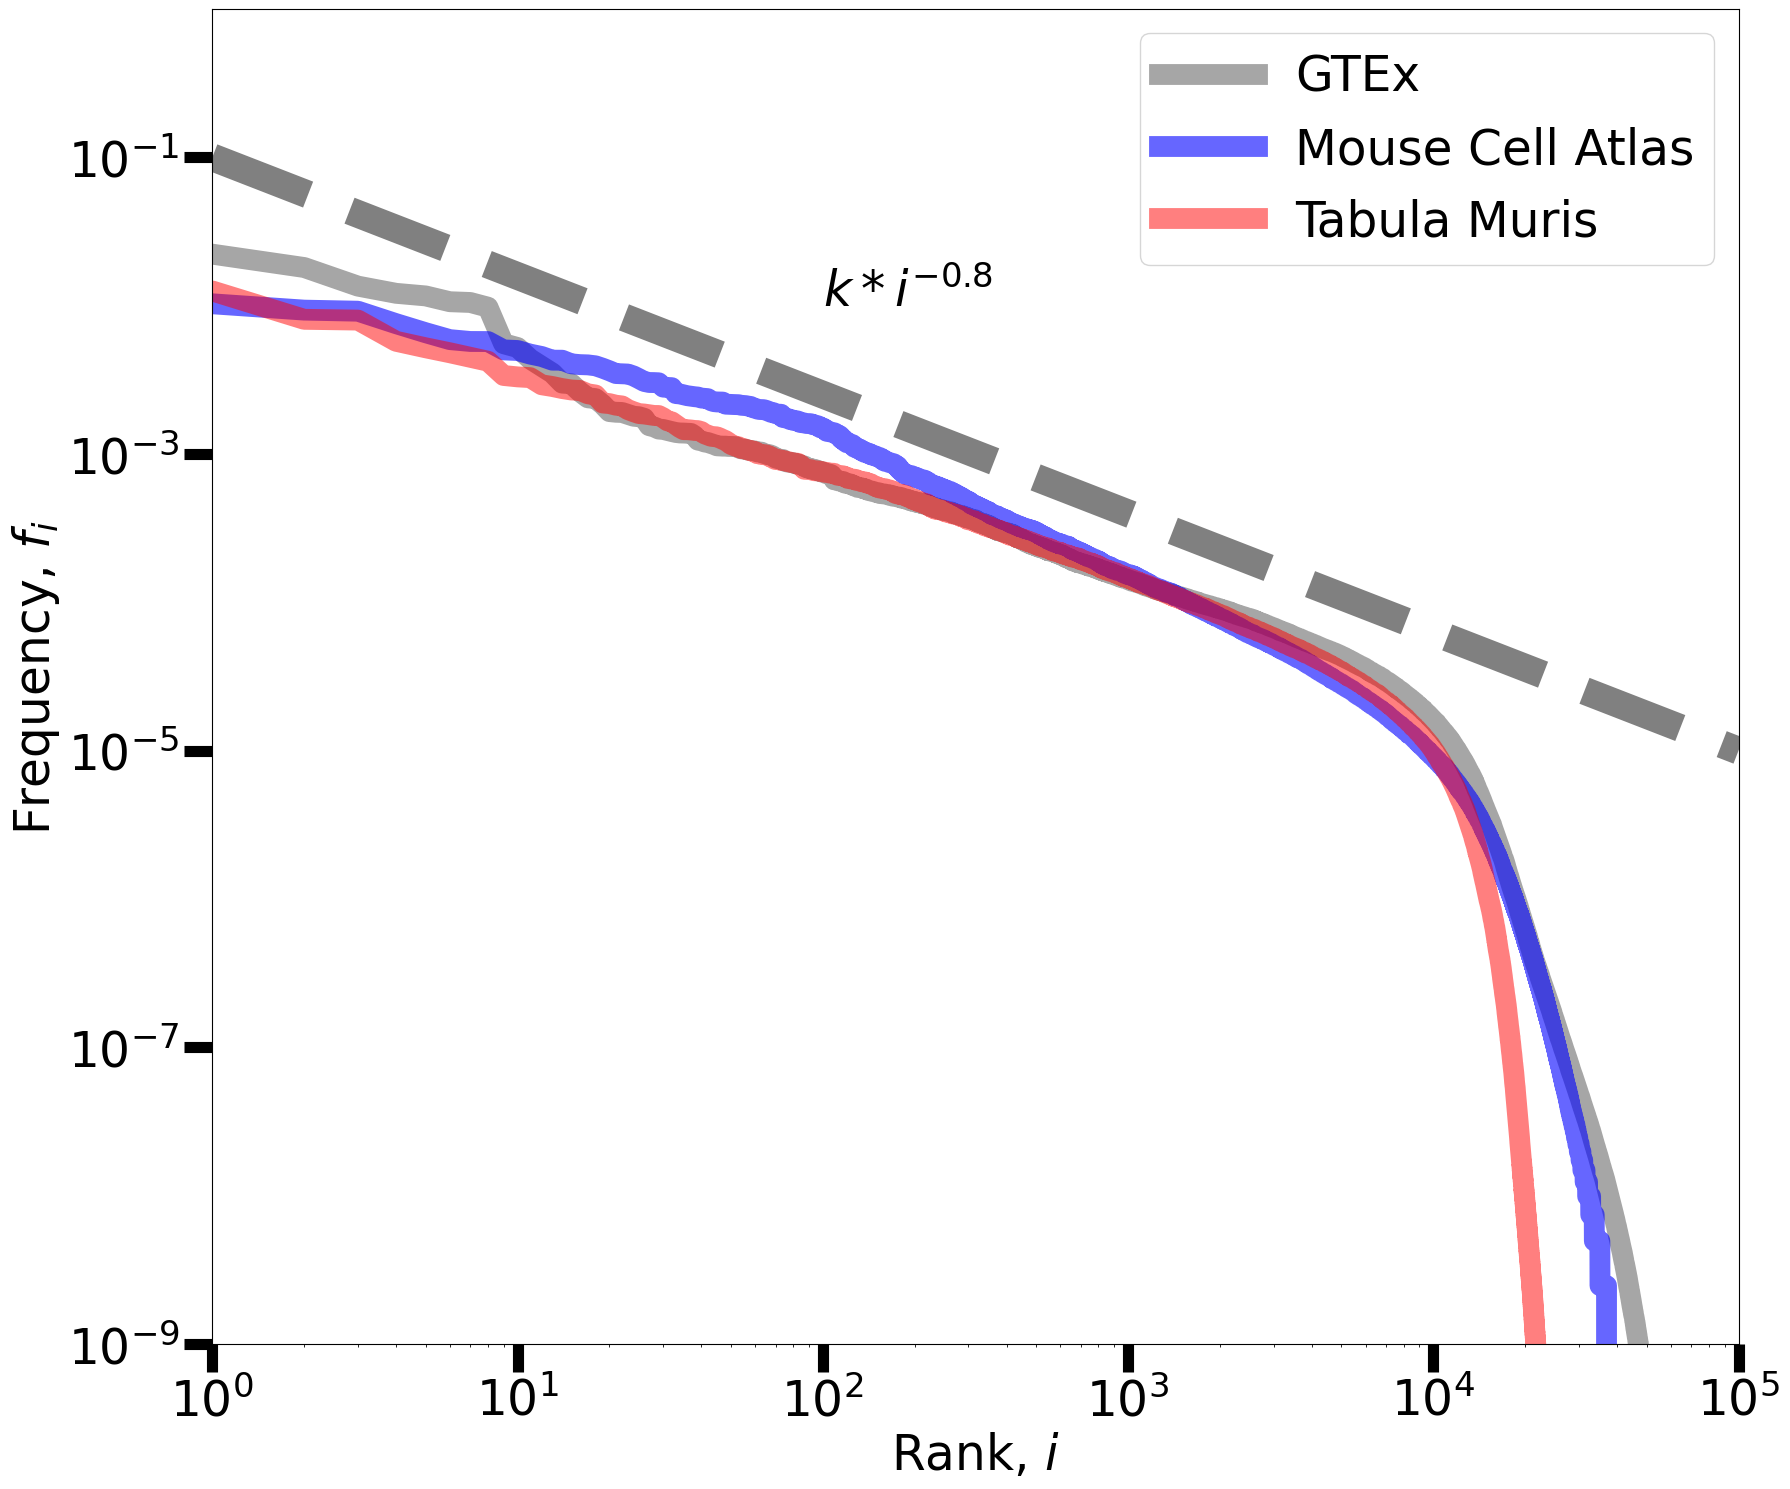

In [22]:
fig, ax = PyPlot.subplots(figsize=(18,15))

X = collect(1:1e5)

ax.plot(X,[1e-1*x^-0.8 for x in X], lw=20, ls="--", color="gray")

ax.plot(f_gtex, label="GTEx", lw=15, color="gray", alpha=0.7)
ax.plot(f_mca, label="Mouse Cell Atlas", lw=15, color="blue", alpha=0.6)
ax.plot(f_tm, label="Tabula Muris", lw=15, color="red", alpha=0.5)


ax.annotate(L"$k*i^{-0.8}$", (1e2,1e-2), fontsize=35)


ax.legend(fontsize=35)
ax.set_yscale("log")
ax.set_xscale("log")

ax.tick_params(labelsize=35, width=8, length=20)
ax.set_xlabel(L"Rank, $i$", fontsize=35)
ax.set_ylabel(L"Frequency, $f_i$", fontsize=35)

ax.set_xlim(1,1e5)
ax.set_ylim(1e-9,1e0)
show()

fig.savefig("zipf_alldatasets.pdf")

In [23]:
fit_func = function(X, p)
    return p[1]*[x^(-p[2]) for x in X]
end

fit_func_exp = function(X, p)
    return p[1]*[exp(-p[2]*x) for x in X]
end

#9 (generic function with 1 method)

In [30]:
optimize_fit = function(f)
    maxmimum_r2 = -Inf
    optimal_fit = nothing
    optimal_limits = nothing
    fit_exp = nothing
    for left_side::Int32=range(2,20,step=1), right_side::Int32=range(5e2,2e4,step=100)
        #println(left_side," ", right_side)
        
        x_data = left_side:right_side
        y_data = f[left_side:right_side]
        fit = curve_fit(fit_func, x_data, y_data, [1e-1, 0.8])
        popt, pcov = (coef(fit), estimate_covar(fit))
        r_squared = Tacos.estimate_r2(fit_func, popt, x_data, y_data)
        
        if r_squared > maxmimum_r2
            maxmimum_r2 = r_squared
            optimal_fit = fit
            optimal_limits = (left_side, right_side)
        end    
    end
    return maxmimum_r2, optimal_fit, optimal_limits
end

#19 (generic function with 1 method)

In [31]:
r2, fit,  limits = optimize_fit(f_mca);

UndefVarError: UndefVarError: mean not defined

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,15))

popt = coef(fit)

ax.plot(f_gtex, label="GTEx", lw=15, color="gray", alpha=0.7)
ax.plot(f_mca, label="Mouse Cell Atlas", lw=15, color="blue", alpha=0.6)
ax.plot(f_tm, label="Tabula Muris", lw=15, color="red", alpha=0.5)

X = collect(1:1e5)

#ax.plot(X,[1e-1*x^-0.8 for x in X], ls="--", color="gray")
ax.plot(X,[popt[1]*x^-popt[2] for x in X], ls=":", lw=5, color="green", label="$(@sprintf("%.2f", popt[1]))*x^-$(@sprintf("%.2f", popt[2]))")

#ax.annotate(L"$k*i^{-0.8}$", (1e2,1e-2), fontsize=22)
ax.annotate("R^2=$(@sprintf("%.4f", r2))", (10^((log10(limits[1])+log10(limits[2]))/2),1e-6), fontsize=35)

ax.vlines([limits[1] limits[2]], 1e-9, 1e-1, colors="gray", ls="-.", lw=15, alpha =0.5)
ax.annotate("$(limits[1])", (limits[1],2e-9), fontsize=35, alpha=0.8)
ax.annotate("$(limits[2])", (limits[2],2e-9), fontsize=35, alpha=0.8)


ax.legend(fontsize=35)
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel(L"Rank, $i$", fontsize=35)
ax.set_ylabel(L"Frequency, $f_i$", fontsize=35)

ax.tick_params(labelsize=35, width=8, length=20)

ax.set_xlim(1,1e5)
ax.set_ylim(1e-9,1e0)
show()

fig.savefig("zipf_alldatasets_fit_tm.pdf")

In [ ]:
f = load_pickle("mca/data_all.pkl")["freq"].values

In [ ]:
df = CSV.read("tm/mainTable_Aorta-counts.csv.csv");
df_values = convert(Array, select!(df,Not(1)));
df_values=df_values./sum(df_values, dims = 1)
df_values = reshape(df_values,1,size(df_values)[1]*size(df_values)[2])
df_values = df_values[df_values.>0]
x=[log2(dge) for dge in df_values];

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,10))

bin_count, bin_edges = ax.hist(x, lw=10, histtype="step", density=true, bins = 20)

x_bins = (bin_edges[2:length(bin_edges)]+ bin_edges[1:length(bin_edges)-1])/2

#ax.plot(x_bins, pdf(kde(x), x_bins), lw=10, alpha=0.8)

ax.set_xlabel("Log(counts)", fontsize=35)
ax.set_ylabel("pdf", fontsize=35)

#ax.set_yscale("log")
PyPlot.show()

fig.savefig("all_hist.pdf")

In [ ]:
data = load_pickle("mca/data_all.pkl")

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,15))

ax.scatter(data["means"], data["var"], c="gray", alpha=0.3, label="data")

x = range(1e-5,10, length=10)
ax.plot(x,x, lw=5, color="red", ls="--", label=L"$m_g$ (Poisson)")

x = range(0.5,5e5, length=10)
ax.plot(x,[x_i^2 for x_i in x], lw=5, color="blue", ls="--", label=L"$m_g^2$ (Taylor)")


ax.set_xlabel(L"Mean expression level, $m_g$", fontsize=35)
ax.set_ylabel(L"Variance of expression level, $v_g$", fontsize=35)

ax.set_xscale("log")
ax.set_yscale("log")

ax.tick_params(labelsize=35, width=8, length=20)

ax.set_xlim(1e-5, data["means"].max()*1.5)
ax.set_ylim(1e-6, data["var"].max()*1.5)

ax.legend(fontsize=22)

PyPlot.show()
fig.savefig("sigma2_var_mca.pdf")

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,15))

means = [m for (m,v) in zip(data["means"], data["var"]) if v>1e-6]
vars = [v for v in data["var"] if v>1e-6]

ax.scatter(means, [v/m/m for (m,v) in zip(means, vars)], c="gray", alpha=0.3, label="data")

x = range(1e-5,10, length=10)
ax.plot(x,[1/x_i for x_i in x], lw=5, color="red", ls="--", label=L"$m_g^{-1}$ (Poisson)")

x = range(0.5,5e5, length=10)
ax.plot(x,[1 for _ in x], lw=5, color="blue", ls="--", label=L"$1$ (Taylor)")


ax.set_ylabel(L"Coefficient of variation squared, $CV^2_g$", fontsize=35)
ax.set_xlabel(L"Mean expression level, $m_g$", fontsize=35)

ax.set_xscale("log")
ax.set_yscale("log")

ax.tick_params(labelsize=35, width=8, length=20)

ax.set_xlim(1e-5, maximum(means)*1.5)
ax.set_ylim(5e-2, 1e5)

ax.legend(fontsize=35)

PyPlot.show()
fig.savefig("cv2_var_mca.pdf")

In [ ]:
fig, ax = PyPlot.subplots(figsize=(18,10))

ax.hist(data["M"], density=true, color="gray", histtype="step", lw=10, bins=100)

m = mean(data["M"])
ax.vlines([m], 0,3e-8, lw=5, ls="-.")
ax.annotate("Average: $(@sprintf("%.0f", m))", (m*1.1,2e-8), fontsize=22)

ax.set_xlabel(L"Reads per cell, $M$", fontsize=22)
ax.set_ylabel("Probability density function", fontsize=22)

#ax.set_xscale("log")
#ax.set_yscale("log")

ax.set_xlim(1,3e8)

ax.legend(fontsize=22)

PyPlot.show()
fig.savefig("M_hist_gtex.pdf")